## Case Study - Churn Prediction

A ride-sharing company (Company X) is interested in predicting rider retention.
To help explore this question, we have provided a sample dataset of a cohort of
users who signed up for an account in January 2014. The data was pulled on July 1, 2014;
we consider a user retained if they were “active” (i.e. took a trip) in
the preceding 30 days (from the day the data was pulled). Assume the latest day of
`last_trip_date` to be when the data was pulled. The data is `churn.csv` in the
[data](data) folder.

We would like you to use this data set to help understand **what factors are the best
predictors for retention**, and offer suggestions to operationalize those insights to
help Company X. Therefore, your task is not only to build a model that minimizes error,
but also a model that allows you to interpret the factors that contributed to your predictions.

Here is a detailed description of the data:

```
city: city this user signed up in
phone: primary device for this user
signup_date: date of account registration; in the form `YYYYMMDD`
last_trip_date: the last time this user completed a trip; in the form `YYYYMMDD`
avg_dist: the average distance (in miles) per trip taken in the first 30 days after signup
avg_rating_by_driver: the rider’s average rating over all of their trips
avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
surge_pct: the percent of trips taken with surge multiplier > 1
avg_surge: The average surge multiplier over all of this user’s trips
trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
luxury_car_user: TRUE if the user took a luxury car in their first 30 days; FALSE otherwise
weekday_pct: the percent of the user’s trips occurring during a weekday
```


## Work Flow

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
   data for this analysis.

2. Build a predictive model to help determine whether or not a user will be retained.

3. Evaluate the model

4. Identify / interpret features that are the most influential in affecting your predictions

5. Discuss the validity of your model. Issues such as [leakage](https://www.kaggle.com/wiki/Leakage)

6. Repeat 2 - 5 until you have a satisfactory model

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('data/churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
# df has nans

In [5]:
df1 = pd.read_csv('data/churn_train.csv')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null object
phone                     39681 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [7]:
df2 = pd.read_csv('data/churn_test.csv')

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
avg_dist                  10000 non-null float64
avg_rating_by_driver      9961 non-null float64
avg_rating_of_driver      8406 non-null float64
avg_surge                 10000 non-null float64
city                      10000 non-null object
last_trip_date            10000 non-null object
phone                     9923 non-null object
signup_date               10000 non-null object
surge_pct                 10000 non-null float64
trips_in_first_30_days    10000 non-null int64
luxury_car_user           10000 non-null bool
weekday_pct               10000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 869.2+ KB


In [14]:
df.drop?

In [12]:
pd.datetime?

In [18]:
df.dropna?

In [23]:
df2 = df.dropna()

In [25]:
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt

In [32]:
import seaborn as sns

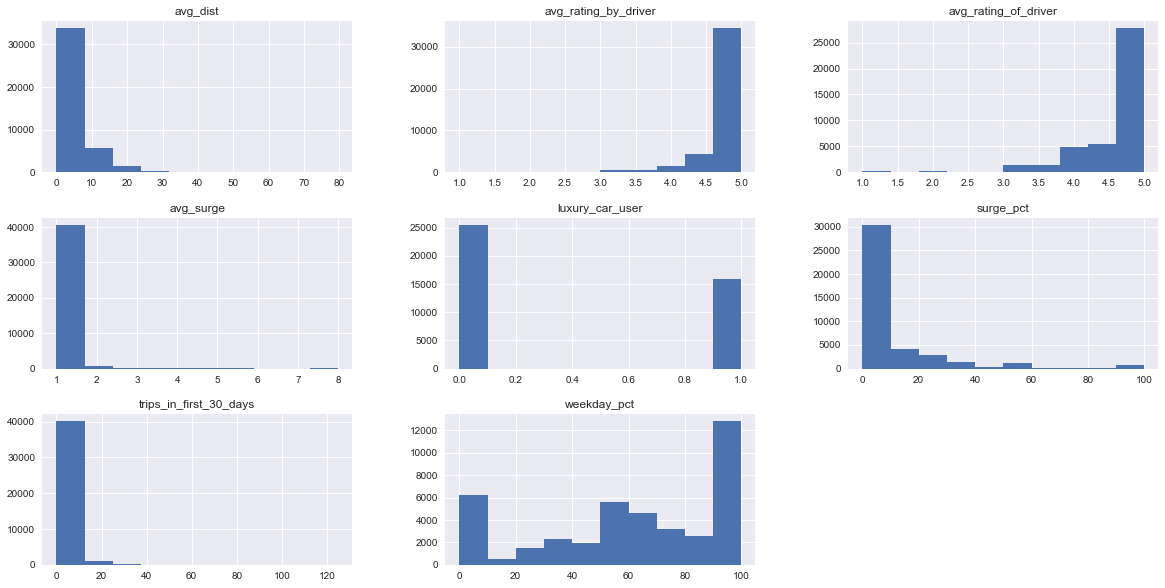

In [34]:
df2.hist(figsize=(20,10));

In [35]:
from pandas.tools.plotting import scatter_matrix

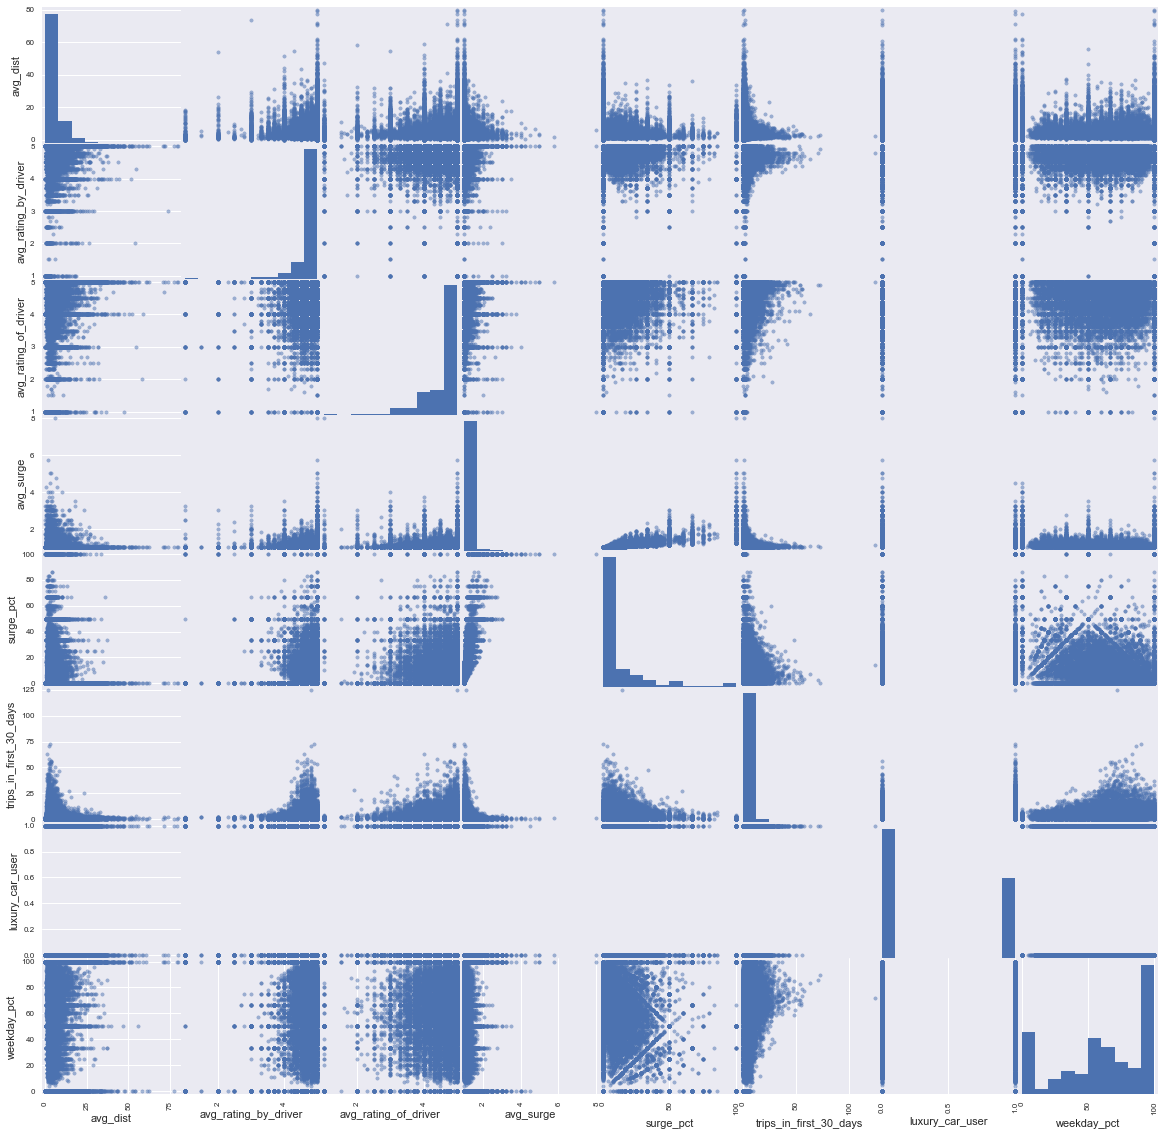

In [39]:
scatter_matrix(df2,figsize=(20,20));

In [43]:
scatter_matrix?

Brainstorm: 
- feature engineering: 
    - phones 
    - surge in price? 
    - significance of surge?  
    - daysofweek: 
    - signupdate: 
- model selection 
    - log reg 
    - boosting 
    - trees 
    - random forest 
    

In [44]:
### Ordered list of models: 

- logistic regression 
- random forest 
- 

SyntaxError: invalid syntax (<ipython-input-44-1a40e35611b5>, line 3)

In [ ]:
import sklearn.model_selection

In [45]:
df2.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [46]:
df.fillna?

## Deliverables

- Code you used to build the model (submit via pull request)

- A (verbal) presentation including the following points:
    - How did you compute the target?
    - What model did you use in the end? Why?
    - Alternative models you considered? Why are they not good enough?
    - What performance metric did you use? Why?
    - Based on insights from the model, what actionable plans do you propose to reduce churn?

In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null datetime64[ns]
phone                     41445 non-null object
signup_date               41445 non-null object
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
luxury_car_user           41445 non-null bool
weekday_pct               41445 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [54]:
# Change time data to right data type 
df2['last_trip_date'] = pd.to_datetime(df2['last_trip_date'])

/Users/User1/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [56]:
df2.signup_date.

0        2014-01-25
1        2014-01-29
2        2014-01-06
3        2014-01-10
4        2014-01-27
5        2014-01-09
7        2014-01-28
8        2014-01-21
10       2014-01-13
11       2014-01-06
13       2014-01-29
16       2014-01-11
17       2014-01-12
18       2014-01-28
19       2014-01-02
23       2014-01-21
24       2014-01-19
26       2014-01-16
27       2014-01-19
29       2014-01-27
30       2014-01-26
31       2014-01-25
32       2014-01-05
35       2014-01-17
37       2014-01-02
38       2014-01-22
40       2014-01-31
41       2014-01-18
42       2014-01-25
43       2014-01-13
            ...    
49963    2014-01-09
49964    2014-01-24
49965    2014-01-22
49966    2014-01-31
49967    2014-01-12
49968    2014-01-11
49969    2014-01-29
49970    2014-01-16
49972    2014-01-12
49973    2014-01-01
49974    2014-01-05
49975    2014-01-11
49976    2014-01-21
49977    2014-01-06
49978    2014-01-17
49979    2014-01-24
49981    2014-01-26
49982    2014-01-21
49983    2014-01-27


# Reccomendations on reducing churn for Company X

### What factors are the best predictors for retention?
